In [1]:
# General libraries
import pandas as pd
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')

# Scikit Learn libraries
from sklearn.model_selection import train_test_split

# Utils functions
from utils.utils import compare_models, plot_score_dist, compare_confidence_intervals, five_two, read_datasets

In [2]:
x_train, x_test, y_train, y_test = read_datasets(
    'x_train.csv',
    'x_test.csv',
    'y_train.csv',
    'y_test.csv'
)

In [3]:
def load_model(model):
    models_folder = '../models/'
    return joblib.load(models_folder + model + '_model.joblib')

In [4]:
#1000 to 10.000 did not show significative differences
#size 2270 based on the paper: https://www.econstor.eu/bitstream/10419/67820/1/587473266.pdf
random_state_list = list(np.random.randint(low = 1,high=5000,size=2270))

## Linear Regression VS SVR

In [5]:
five_two(
    reg1=load_model('lr'),
    reg2=load_model('svr'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = 0.003335
Fold  2 score difference = -0.132111
Fold  1 score difference = -0.112742
Fold  2 score difference = -0.129562
Fold  1 score difference = -0.235012
Fold  2 score difference = -0.104680
Fold  1 score difference = -0.029242
Fold  2 score difference = -0.096055
Fold  1 score difference = -0.172113
Fold  2 score difference = -0.105608
Regression 1 mean score and stdev : 0.044218 + 0.075158
Regression 2 mean score and stdev : 0.155597 + 0.047330
Score difference mean + stdev : -0.111379 + 0.063210
t_value for the current test is 0.049986


mean_score_1 0.008923361912302892, std 0.1096309677399407
mean_score_2 0.18334044881703795, std 0.09930287432592079
Ttest_relResult(statistic=-101.26746268485032, pvalue=0.0)
P value menor ou igual a 0.05


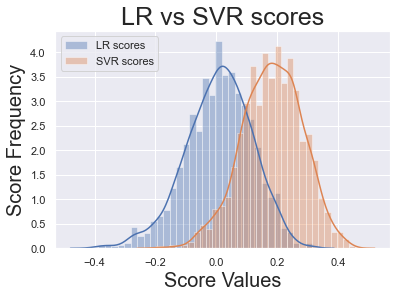

In [6]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('svr'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)


plot_score_dist(reg1_scores, reg2_scores, 'LR', 'SVR')

In [7]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.22870679948366401
0.20498997501617644
-0.023884111737967548
0.36741081659440444


## Linear Regression VS XGBoost

In [8]:
five_two(
    reg1=load_model('lr'),
    reg2=load_model('xgboost'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

[10:59:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  1 score difference = -0.018624
[10:59:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  2 score difference = -0.102088
[10:59:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You hav

mean_score_1 0.008923361912302892, std 0.1096309677399407
mean_score_2 0.2588076874437309, std 0.07164570365889718
Ttest_relResult(statistic=-141.96004271173226, pvalue=0.0)
P value menor ou igual a 0.05


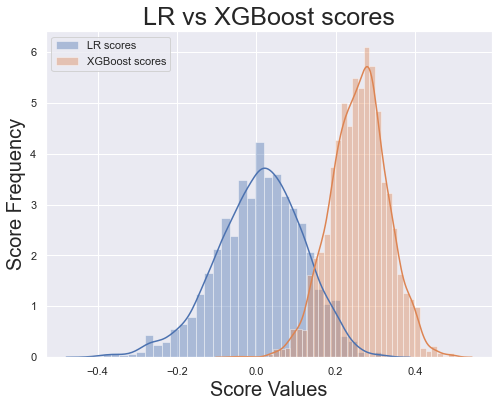

In [9]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'LR', 'XGBoost')

In [10]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.22870679948366401
0.20498997501617644
0.11468812004529388
0.3979987012925632


## SVR VS XGboost

In [11]:
five_two(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

[11:00:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  1 score difference = -0.021958
[11:00:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  2 score difference = 0.030023
[11:00:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have

mean_score_1 0.18334044881703795, std 0.09930287432592079
mean_score_2 0.2588076874437309, std 0.07164570365889718
Ttest_relResult(statistic=-53.33339613610155, pvalue=0.0)
P value menor ou igual a 0.05


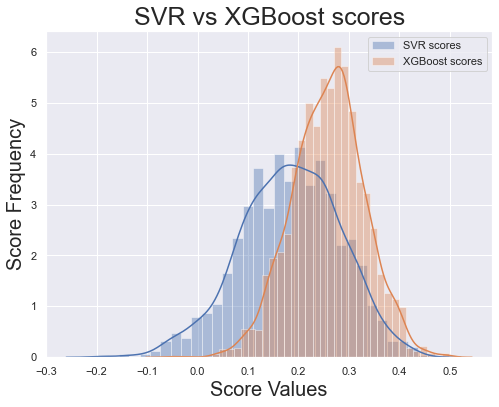

In [12]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'SVR', 'XGBoost')

In [13]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.023884111737967548
0.36741081659440444
0.11468812004529388
0.3979987012925632


mean_score_1 -0.654259090857795, std 0.20115197619866004
mean_score_2 -0.5013895562037245, std 0.14512847664238146
Ttest_relResult(statistic=-53.333396136101555, pvalue=0.0)
P value menor ou igual a 0.05


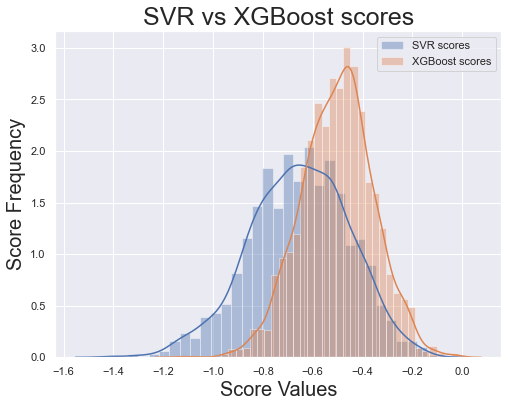

In [14]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    metric="adj_r2",
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'SVR', 'XGBoost')

In [15]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-1.074021662238447
-0.2813986022831294
-0.7933240645236352
-0.21943852815096165


# XGBoost vs Neural Network

In [17]:
five_two(
    reg1=load_model('xgboost'),
    reg2=load_model('mlpRegressor'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

[11:39:51] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  1 score difference = 0.010764
[11:39:52] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  2 score difference = -0.048555
[11:39:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have

mean_score_1 0.2588076874437309, std 0.07164570365889718
mean_score_2 0.13965924902908108, std 0.08263123537677264
Ttest_relResult(statistic=103.19858820085962, pvalue=0.0)
P value menor ou igual a 0.05


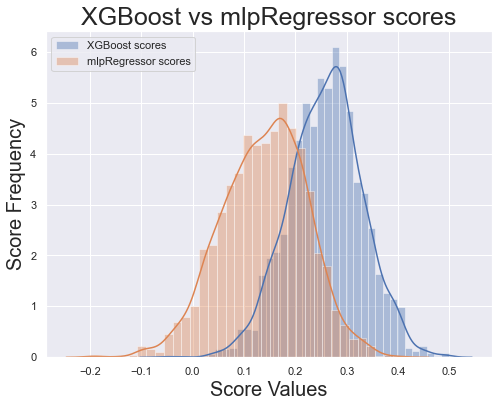

In [18]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('xgboost'),
    reg2=load_model('mlpRegressor'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'XGBoost', 'mlpRegressor')

In [19]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

0.11468812004529388
0.3979987012925632
-0.027936306303717733
0.2954762127295836
